In [141]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [142]:
rng = np.random.default_rng(12345)

In [143]:
x = np.arange(0, 10, 0.1)
noise = np.array([rng.random() for _ in range(x.shape[0])])
y = 0.5 * np.exp(0.2 * x) + noise * 0.15

## Line fit

In [144]:
c = np.polyfit(x, y, 1)
y_line = np.poly1d(c)(x)
sse_line = (y - y_line) ** 2 / y.shape[0]

## Exponential fit

In [145]:
def exp_func(x, a, k):
    return a * np.exp(k * x)

In [146]:
exp_popt, exp_pcov = curve_fit(exp_func, x, y)

## Power fit

In [147]:
def power_func(x, a, k):
    return a * x ** k

In [148]:
pow_popt, pcov = curve_fit(power_func, x, y)

## Plotting

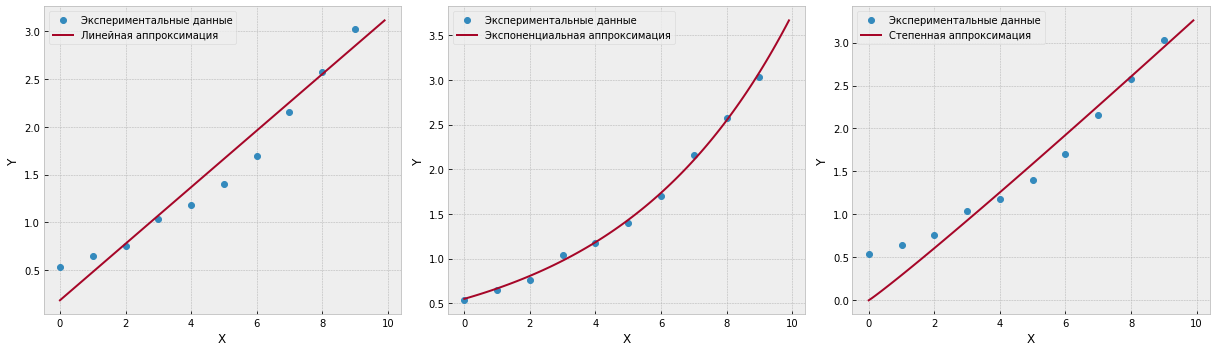

In [149]:
plt.style.use('bmh')

fig, axs = plt.subplots(1, 3, figsize=(17, 5), )

axs[0].plot(x[::10], y[::10], linestyle='None', marker='o', label='Экспериментальные данные')
axs[0].plot(x, y_line, label='Линейная аппроксимация')
axs[0].set_ylabel('Y')
axs[0].set_xlabel('X')
axs[0].legend()

axs[1].plot(x[::10], y[::10], linestyle='None', marker='o', label='Экспериментальные данные')
axs[1].plot(x, exp_func(x, *exp_popt), label='Экспоненциальная аппроксимация')
axs[1].set_ylabel('Y')
axs[1].set_xlabel('X')
axs[1].legend()

axs[2].plot(x[::10], y[::10], linestyle='None', marker='o', label='Экспериментальные данные')
axs[2].plot(x, power_func(x, *pow_popt), label='Степенная аппроксимация')
axs[2].set_ylabel('Y')
axs[2].set_xlabel('X')
axs[2].legend()

plt.tight_layout()
plt.savefig('plot.svg')

In [150]:
cp = np.array([129.20, 170.54, 206.48, 236.14, 260.58, 280.96, 298.19, 312.84])
dh = np.array([29.62, 21.88, 15.52, 10.38, 6.40, 3.35, 1.13, 0.21])
t = np.array([i for i in range(300, 1100, 100)])
t_ = np.array([i for i in range(300, 1050, 50)])

In [151]:
c = np.polyfit(t, cp, 1)
y_line = np.poly1d(c)(t_)

In [152]:
exp_popt, exp_pcov = curve_fit(exp_func, t, cp, bounds=(0, [110, 0.1]))

In [153]:
pow_popt, pcov = curve_fit(power_func, t, cp)

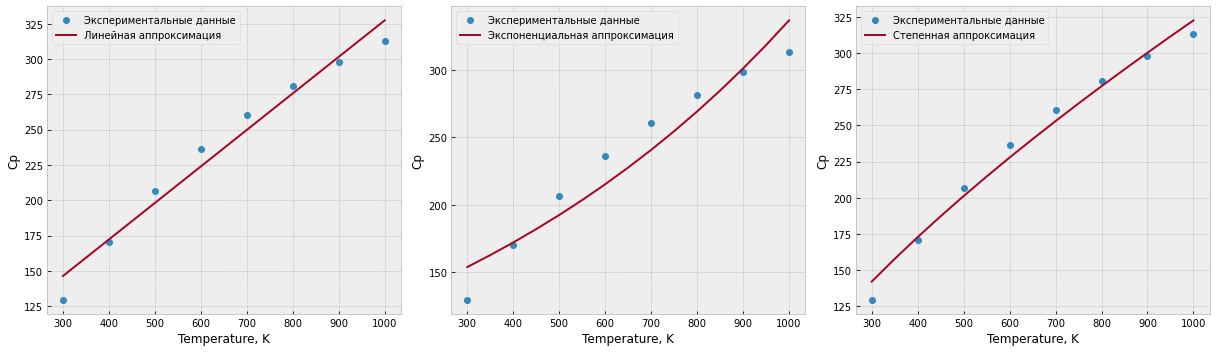

In [154]:
plt.style.use('bmh')

fig, axs = plt.subplots(1, 3, figsize=(17, 5), )

axs[0].plot(t, cp, linestyle='None', marker='o', label='Экспериментальные данные')
axs[0].plot(t_, y_line, label='Линейная аппроксимация')
axs[0].set_ylabel('Cp')
axs[0].set_xlabel('Temperature, K')
axs[0].legend()

axs[1].plot(t, cp, linestyle='None', marker='o', label='Экспериментальные данные')
axs[1].plot(t_, exp_func(t_, *exp_popt), label='Экспоненциальная аппроксимация')
axs[1].set_ylabel('Cp')
axs[1].set_xlabel('Temperature, K')
axs[1].legend()

axs[2].plot(t, cp, linestyle='None', marker='o', label='Экспериментальные данные')
axs[2].plot(t_, power_func(t_, *pow_popt), label='Степенная аппроксимация')
axs[2].set_ylabel('Cp')
axs[2].set_xlabel('Temperature, K')
axs[2].legend()

plt.tight_layout()
plt.savefig('plot1.svg')

In [155]:
c

array([ 0.258525, 68.825   ])

In [156]:
y_line

array([146.3825 , 159.30875, 172.235  , 185.16125, 198.0875 , 211.01375,
       223.94   , 236.86625, 249.7925 , 262.71875, 275.645  , 288.57125,
       301.4975 , 314.42375, 327.35   ])

In [157]:
exp_popt

array([1.10000000e+02, 1.11828973e-03])

In [158]:
exp_func(t_, *exp_popt)

array([153.84833598, 162.69573053, 172.0519144 , 181.94614666,
       192.40936901, 203.47430248, 215.17554984, 227.54970374,
       240.63546119, 254.47374456, 269.10782952, 284.58348046,
       300.9490935 , 318.25584793, 336.5578662 ])

In [159]:
pow_popt

array([2.92436537, 0.68084799])

In [160]:
power_func(t_, *pow_popt)

array([142.09364534, 157.81753039, 172.83788509, 187.26906212,
       201.19627271, 214.68517592, 227.78772804, 240.54594106,
       252.99440103, 265.16201484, 277.07325735, 288.74908414,
       300.20761373, 311.46464728, 322.53407069])

In [161]:
c = np.polyfit(t, dh, 1)
y_line = np.poly1d(c)(t_)

In [162]:
exp_popt, exp_pcov = curve_fit(exp_func, t, dh, bounds=(-0.1, [360, 0]))

In [163]:
pow_popt, pcov = curve_fit(power_func, t, dh)

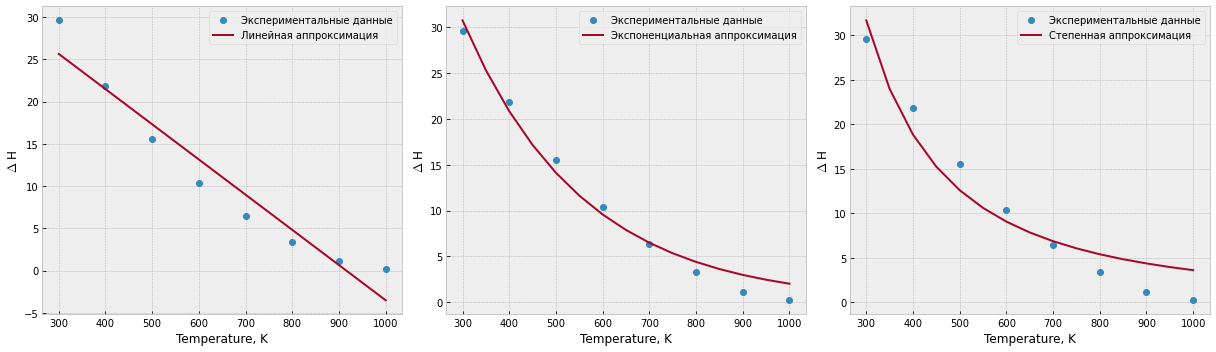

In [164]:
plt.style.use('bmh')

fig, axs = plt.subplots(1, 3, figsize=(17, 5), )

axs[0].plot(t, dh, linestyle='None', marker='o', label='Экспериментальные данные')
axs[0].plot(t_, y_line, label='Линейная аппроксимация')
axs[0].set_ylabel(f'$\Delta$ H')
axs[0].set_xlabel('Temperature, K')
axs[0].legend()

axs[1].plot(t, dh, linestyle='None', marker='o', label='Экспериментальные данные')
axs[1].plot(t_, exp_func(t_, *exp_popt), label='Экспоненциальная аппроксимация')
axs[1].set_ylabel(f'$\Delta$ H')
axs[1].set_xlabel('Temperature, K')
axs[1].legend()

axs[2].plot(t, dh, linestyle='None', marker='o', label='Экспериментальные данные')
axs[2].plot(t_, power_func(t_, *pow_popt), label='Степенная аппроксимация')
axs[2].set_ylabel(f'$\Delta$ H')
axs[2].set_xlabel('Temperature, K')
axs[2].legend()

plt.tight_layout()
plt.savefig('plot2.svg')

In [165]:
c

array([-0.04167976, 38.15309524])

In [166]:
y_line

array([25.64916667, 23.56517857, 21.48119048, 19.39720238, 17.31321429,
       15.22922619, 13.1452381 , 11.06125   ,  8.9772619 ,  6.89327381,
        4.80928571,  2.72529762,  0.64130952, -1.44267857, -3.52666667])

In [167]:
pow_popt

array([ 9.45640301e+05, -1.80645235e+00])

In [168]:
exp_func(t_, *exp_popt)

array([30.74759244, 25.31425319, 20.84102734, 17.15825536, 14.12625789,
       11.63003801,  9.57491964,  7.88295671,  6.48997681,  5.34314732,
        4.39897154,  3.62163898,  2.98166715,  2.45478332,  2.02100397])

In [169]:
pow_popt

array([ 9.45640301e+05, -1.80645235e+00])

In [170]:
power_func(t_, *pow_popt)

array([31.69016199, 23.98768149, 18.84640782, 15.23435215, 12.59404567,
       10.60208668,  9.05999829,  7.8402882 ,  6.85791235,  6.05431196,
        5.38805774,  4.82914525,  4.35539599,  3.95011888,  3.60055062])